<a href="https://colab.research.google.com/github/afganifajar/DataAnalysis-NetflixDataset/blob/main/DataAnalysis_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook contains simple analysis using Pandas Dataframe to find some informations from Netflix Dataset from Kaggle.

The goal of this analysis is to find informations based on pre-defined questions.

The pre-defined question that need to be analyzed consist of:


1.   Find TV Shows / Movies Information Based on Title: Squid Game
2.   Find List of TV Shows and Movies from specific country: Indonesia
3.   Find Nostalgia TV Shows: List of TV Show Released on 2005
4.   Find the Total Comparison Number Between TV Show and Movies
5.   Find Frequency of Movies Released per Year
6.   Find Most Common Rating Type of All TV Shows & Movies
7.   Find Most Produced Genre of TV Shows & Movies
8.   Find Most Casted Actor / Actress
9.   Find Country with Most Produced TV Shows & Movies
10.  Find Most Active Director on All TV Shows & Movies
11.  Find Top Longest Season TV Shows
12.  Find Overall Duration of All Movies

# Preparation

In [ ]:
import os
import re
import csv
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Upload your kaggle.json to colab main directory
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && mv kaggle.json ~/.kaggle/ && echo 'Success'

Success


In [ ]:
!kaggle datasets download shivamb/netflix-shows
!unzip -o netflix-shows.zip
!ls

 75% 1.00M/1.34M [00:00<00:00, 5.81MB/s]
100% 1.34M/1.34M [00:00<00:00, 7.69MB/s]
Archive:  netflix-shows.zip
  inflating: netflix_titles.csv      
netflix-shows.zip  netflix_titles.csv  sample_data


# Data Exploration

In [ ]:
df = pd.read_csv('netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
df.shape

(8807, 12)

In [ ]:
df.size

105684

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Data Cleaning: Duplicate and Null Value

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

In [ ]:
duplicate = df[df.duplicated()]
print('Total duplicate rows:', len(duplicate))
duplicate

Total duplicate rows: 0


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [ ]:
# Since we have 0 duplicate, no need to run this code
# df.drop_duplicates(inplace = True)  

In [ ]:
df.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
# No null value on important column like show_id or title, no need to run this code
# df = df[df['show_id'].notnull()]
# df = df[df['title'].notnull()]

# Analysis Part

In [ ]:
# Print dataframe once again
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## TV Shows / Movies Information Based on Title: Squid Game

In [ ]:
# Using the isin() function
df[df['title'].isin(['Squid Game'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
33,s34,TV Show,Squid Game,NaN,"Lee Jung-jae, Park Hae-soo, Wi Ha-jun, Oh Youn...",NaN,"September 17, 2021",2021,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Thrillers",Hundreds of cash-strapped players accept a str...


In [ ]:
# Using the isin() function
df[df['title'].str.contains('Squid Game')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
33,s34,TV Show,Squid Game,NaN,"Lee Jung-jae, Park Hae-soo, Wi Ha-jun, Oh Youn...",NaN,"September 17, 2021",2021,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Thrillers",Hundreds of cash-strapped players accept a str...


## List of TV Shows and Movies from specific country: Indonesia

In [ ]:
# Searching Indonesia on country column
df_indonesia = df[df['country'].isin(['Indonesia'])]
df_indonesia

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
452,s453,Movie,A Perfect Fit,Hadrah Daeng Ratu,"Nadya Arina, Refal Hady, Giorgino Abraham, Ang...",Indonesia,"July 15, 2021",2021,TV-PG,113 min,"Comedies, Dramas, International Movies",Sparks fly when a fashion blogger in Bali meet...
534,s535,Movie,Si Doel the Movie 2,Rano Karno,"Maudy Koesnaedi, Rano Karno, Cornelia Agatha, ...",Indonesia,"July 6, 2021",2019,TV-G,95 min,"Dramas, International Movies",As Sarah and her child look to settle in Jakar...
1090,s1091,Movie,Story of Kale: When Someone's in Love,Angga Dwimas Sasongko,"Ardhito Pramono, Aurélie Moeremans, Arya Salok...",Indonesia,"April 8, 2021",2020,TV-PG,78 min,"Dramas, International Movies, Romantic Movies","After leaving a toxic relationship, Dinda emba..."
1136,s1137,Movie,Tersanjung the Movie,"Hanung Bramantyo, Pandu Adjisurya","Clara Bernadeth, Giorgino Abraham, Kevin Ardil...",Indonesia,"April 1, 2021",2021,TV-14,114 min,"Dramas, International Movies, Romantic Movies","After growing up in a tumultuous household, Yu..."
1221,s1222,Movie,Generasi 90an: Melankolia,Mohammad Irfan Ramly,"Ari Irham, Aghniny Haque, Taskya Namya, Marcel...",Indonesia,"March 11, 2021",2020,TV-14,94 min,"Dramas, International Movies","After the devastating loss of a loved one, Abb..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8317,s8318,Movie,The Gathering,Nia Dinata,"Cut Mini Theo, Tora Sudiro, Aida Nurmala, Sury...",Indonesia,"December 8, 2018",2003,TV-14,124 min,"Comedies, Dramas, International Movies","Between divorce, bad relationships and coming ..."
8374,s8375,Movie,The Jungle School,Riri Riza,"Prisia Nasution, Nyungsang Bungo, Rukman Rosad...",Indonesia,"October 30, 2018",2013,TV-PG,90 min,"Dramas, International Movies",An idealistic young woman travels to the jungl...
8472,s8473,Movie,The Rainbow Troops,Riri Riza,"Cut Mini Theo, Ikranagara, Lukman Sardi, Ario ...",Indonesia,"October 21, 2018",2008,TV-PG,119 min,"Children & Family Movies, Dramas, Internationa...",Two Indonesian teachers embrace an inspiring c...
8509,s8510,Movie,The Sinking Of Van Der Wijck,Sunil Soraya,"Herjunot Ali, Pevita Pearce, Reza Rahadian, Ra...",Indonesia,"September 28, 2018",2013,TV-14,163 min,"Dramas, International Movies, Romantic Movies",When a young man leaves home to fulfill the wi...


In [ ]:
# Title only
df_indonesia['title']

452                             A Perfect Fit
534                       Si Doel the Movie 2
1090    Story of Kale: When Someone's in Love
1136                     Tersanjung the Movie
1221                Generasi 90an: Melankolia
                        ...                  
8317                            The Gathering
8374                        The Jungle School
8472                       The Rainbow Troops
8509             The Sinking Of Van Der Wijck
8725                     What's Up With Love?
Name: title, Length: 79, dtype: object

## Nostalgia TV Shows: List of TV Show Released on 2005

In [ ]:
# TV show only
df_show = df[df['type']=='TV Show']
df_show

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [ ]:
# Looking at number of release per year
df_show['release_year'].value_counts()

2020    436
2019    397
2018    380
2021    315
2017    265
2016    244
2015    162
2014     88
2012     64
2013     63
2010     40
2011     40
2009     34
2008     23
2006     14
2007     14
2005     13
2003     10
2004      9
1999      7
2002      7
2001      5
1993      4
2000      4
1997      4
1998      4
1990      3
1996      3
1992      3
1995      2
1994      2
1988      2
1986      2
1989      1
1967      1
1985      1
1946      1
1981      1
1972      1
1979      1
1977      1
1991      1
1974      1
1925      1
1945      1
1963      1
Name: release_year, dtype: int64

In [ ]:
# Searching specific value on release_year column
df_show_2005 = df_show[df_show['release_year']==2005]
df_show_2005

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
319,s320,TV Show,The Prince Who Turns into a Frog,NaN,"Joe Chen, Ming Dao, Sam Wang, Joyce Chao, Gino...",Taiwan,"August 3, 2021",2005,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Before his wedding, a cold CEO is hit by a car..."
1149,s1150,TV Show,Yu-Gi-Oh!,NaN,"Dan Green, Eric Stuart, Amy Birnbaum, Darren D...",Japan,"March 31, 2021",2005,TV-Y7,1 Season,"Anime Series, Kids' TV",The lives of young Yugi Moto and his friends J...
1314,s1315,TV Show,Chappelle's Show,NaN,Dave Chappelle,United States,"February 12, 2021",2005,TV-MA,2 Seasons,TV Comedies,The brilliant Dave Chappelle performs blisteri...
1848,s1849,TV Show,Half & Half,NaN,"Rachel True, Essence Atkins, Telma Hopkins, Ch...",United States,"October 15, 2020",2005,TV-14,4 Seasons,TV Comedies,After two estranged half-sisters in their twen...
1893,s1894,TV Show,DreamWorks Happy Holidays from Madagascar,NaN,"Tom McGrath, Chris Miller, Christopher Knights...",United States,"October 2, 2020",2005,TV-PG,1 Season,"Kids' TV, TV Comedies",Madagascar goes wild with holiday spirit in th...
3148,s3149,TV Show,What's New Scooby-Doo?,NaN,"Frank Welker, Casey Kasem, Mindy Cohn, Grey De...",United States,"December 15, 2019",2005,TV-Y7,3 Seasons,"Kids' TV, TV Comedies",Scooby-Doo and the gang enter the 21st century...
3897,s3898,TV Show,KO One,NaN,"Aaron Yan, Jiro Wang, Calvin Ka-Sing Chen, Dan...",Taiwan,"April 19, 2019",2005,TV-MA,1 Season,"International TV Shows, TV Action & Adventure,...","Gifted with special powers, fighting skills an..."
4553,s4554,TV Show,Monty Python's Personal Best,NaN,"John Cleese, Terry Gilliam, Terry Jones, Graha...","United States, United Kingdom","October 2, 2018",2005,TV-MA,1 Season,"British TV Shows, TV Comedies",Original members of the iconic Monty Python co...
5542,s5543,TV Show,Burned Cocoon,NaN,"Yavuz Bingöl, Basak Köklükaya, Çolpan Ilhan, M...",Turkey,"April 1, 2017",2005,TV-MA,1 Season,"International TV Shows, TV Dramas",A secret marriage unites two families – one we...
5822,s5823,TV Show,Cocaine,NaN,NaN,United Kingdom,"August 1, 2016",2005,TV-14,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Three films chronicle the cocaine trade's swee...


In [ ]:
# Title only
df_show_2005['title']

319              The Prince Who Turns into a Frog
1149                                    Yu-Gi-Oh!
1314                             Chappelle's Show
1848                                  Half & Half
1893    DreamWorks Happy Holidays from Madagascar
3148                       What's New Scooby-Doo?
3897                                       KO One
4553                 Monty Python's Personal Best
5542                                Burned Cocoon
5822                                      Cocaine
7772                         Power Rangers S.P.D.
8174                               That '70s Show
8557                                The West Wing
Name: title, dtype: object

## Total Comparison Number Between TV Show and Movies

In [ ]:
# Number of movies and tv show comparison using groupby() function
comparison = df.groupby('type').type.count()
comparison

type
Movie      6131
TV Show    2676
Name: type, dtype: int64

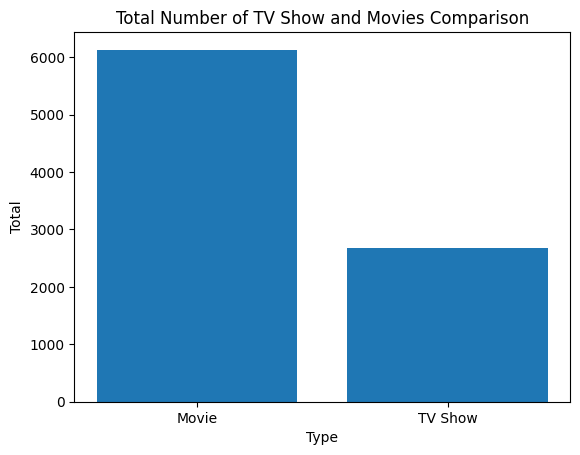

In [ ]:
# Visualize
plt.bar(comparison.index, comparison)
plt.title('Total Number of TV Show and Movies Comparison')
plt.xlabel('Type')
plt.ylabel('Total')
plt.show()

## Frequency of Movies Released per Year

In [ ]:
# Movies only
# Can also use df.loc[df['type']=='Movie']
df_movie = df[df['type']=='Movie']
df_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
# Check data type of date_added and release_year columns
df_movie.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
# Looking at number of movies released per year
df_movie['release_year'].value_counts()

2017    767
2018    767
2016    658
2019    633
2020    517
       ... 
1966      1
1961      1
1946      1
1963      1
1947      1
Name: release_year, Length: 73, dtype: int64

In [ ]:
# Check only the latest 15 years
latest = df_movie['release_year'].value_counts().sort_index(ascending=False)[:15]
latest

2021    277
2020    517
2019    633
2018    767
2017    767
2016    658
2015    398
2014    264
2013    225
2012    173
2011    145
2010    154
2009    118
2008    113
2007     74
Name: release_year, dtype: int64

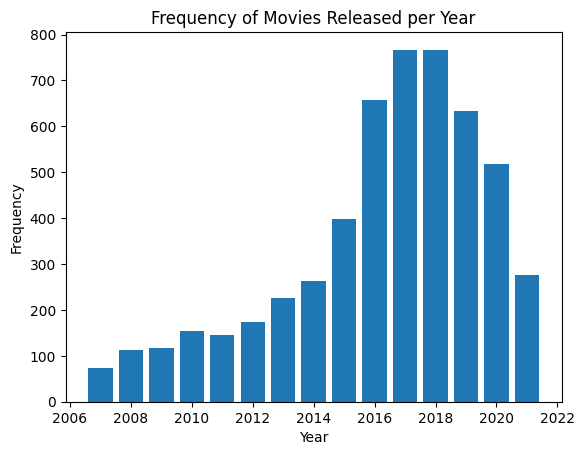

In [ ]:
# Visualize
plt.bar(latest.index, latest)
plt.title('Frequency of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

## Most Common Rating Type of All TV Shows & Movies

In [ ]:
# Simplify the dataframe
df_rating = df[['title','rating']]
df_rating

,title,rating
0,Dick Johnson Is Dead,PG-13
1,Blood & Water,TV-MA
2,Ganglands,TV-MA
3,Jailbirds New Orleans,TV-MA
4,Kota Factory,TV-MA
...,...,...
8802,Zodiac,R
8803,Zombie Dumb,TV-Y7
8804,Zombieland,R
8805,Zoom,PG


In [ ]:
# Looking at unique rating to prevent double rating used
df_rating['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
# Checking null
df_rating['rating'].notnull()

0       True
1       True
2       True
3       True
4       True
        ... 
8802    True
8803    True
8804    True
8805    True
8806    True
Name: rating, Length: 8807, dtype: bool

In [ ]:
# Checking total number of null value
df_rating['rating'].isnull().sum()

4

In [ ]:
# Checking list of missplaced duration into rating
missplaced = df_rating[(df_rating['rating']=='74 min') | (df_rating['rating']=='84 min') | (df_rating['rating']=='66 min')]
missplaced

,title,rating
5541,Louis C.K. 2017,74 min
5794,Louis C.K.: Hilarious,84 min
5813,Louis C.K.: Live at the Comedy Store,66 min


In [ ]:
# Removing missplaced duration and set it to NaN
df_rating['rating'] = df_rating['rating'].replace(r'.*min$', np.nan, regex=True)  # df_rating['rating'] = df_rating['rating'].str.replace(r'.*min$', np.nan)
df_rating['rating'].unique()

<ipython-input-37-92b565b651ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating['rating'] = df_rating['rating'].replace(r'.*min$', np.nan, regex=True)  # df_rating['rating'] = df_rating['rating'].str.replace(r'.*min$', np.nan)


array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
# Checking total number of null value again
df_rating['rating'].isnull().sum()

7

In [ ]:
# Remove null value
df_rating = df_rating[df_rating['rating'].notnull()]
df_rating

,title,rating
0,Dick Johnson Is Dead,PG-13
1,Blood & Water,TV-MA
2,Ganglands,TV-MA
3,Jailbirds New Orleans,TV-MA
4,Kota Factory,TV-MA
...,...,...
8802,Zodiac,R
8803,Zombie Dumb,TV-Y7
8804,Zombieland,R
8805,Zoom,PG


In [ ]:
# Number of rating used
most_common_rating  = df_rating['rating'].value_counts()
most_common_rating

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

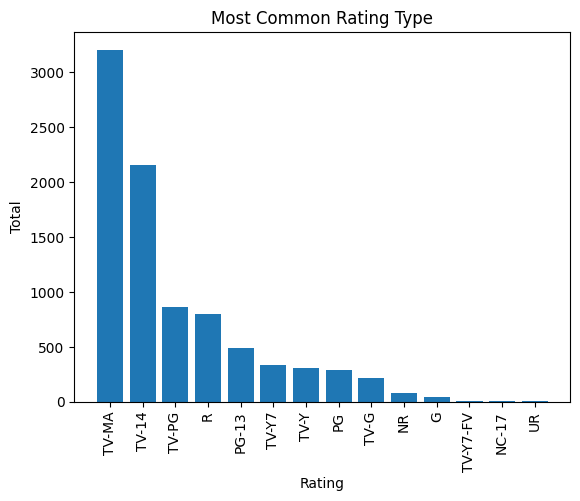

In [ ]:
# Visualize
plt.bar(most_common_rating.index, most_common_rating)
plt.title('Most Common Rating Type')
plt.xlabel('Rating')
plt.ylabel('Total')
plt.xticks(rotation='vertical')
plt.show()

## Most Produced Genre of TV Shows & Movies

In [ ]:
# Simplify the dataframe
df_title_genre = df[['title', 'listed_in']]
df_title_genre

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries"
2,Ganglands,"Crime TV Shows, International TV Shows, TV Act..."
3,Jailbirds New Orleans,"Docuseries, Reality TV"
4,Kota Factory,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...
8802,Zodiac,"Cult Movies, Dramas, Thrillers"
8803,Zombie Dumb,"Kids' TV, Korean TV Shows, TV Comedies"
8804,Zombieland,"Comedies, Horror Movies"
8805,Zoom,"Children & Family Movies, Comedies"


In [ ]:
# Checking null
df_title_genre['listed_in'].notnull()

0       True
1       True
2       True
3       True
4       True
        ... 
8802    True
8803    True
8804    True
8805    True
8806    True
Name: listed_in, Length: 8807, dtype: bool

In [ ]:
# Checking number of null
df_title_genre['listed_in'].isnull().sum()

0

In [ ]:
# Explode the list of genre into new row based on title
df_title_genre = df_title_genre.set_index('title').listed_in.str.split(',', expand=True).stack().reset_index('title')
df_title_genre

,title,0
0,Dick Johnson Is Dead,Documentaries
0,Blood & Water,International TV Shows
1,Blood & Water,TV Dramas
2,Blood & Water,TV Mysteries
0,Ganglands,Crime TV Shows
...,...,...
0,Zoom,Children & Family Movies
1,Zoom,Comedies
0,Zubaan,Dramas
1,Zubaan,International Movies


In [ ]:
# Changing the column name into genre
df_title_genre.columns = ['title', 'genre']
df_title_genre.columns

Index(['title', 'genre'], dtype='object')

In [ ]:
# Check unique genre
df_title_genre['genre'].unique()

array(['Documentaries', 'International TV Shows', ' TV Dramas',
       ' TV Mysteries', 'Crime TV Shows', ' International TV Shows',
       ' TV Action & Adventure', 'Docuseries', ' Reality TV',
       ' Romantic TV Shows', ' TV Comedies', 'TV Dramas', ' TV Horror',
       'Children & Family Movies', 'Dramas', ' Independent Movies',
       ' International Movies', 'British TV Shows', 'Comedies', ' Dramas',
       ' Docuseries', ' Comedies', ' Crime TV Shows', 'TV Comedies',
       ' Spanish-Language TV Shows', 'Thrillers', ' Romantic Movies',
       ' Music & Musicals', 'Horror Movies', ' Sci-Fi & Fantasy',
       ' TV Thrillers', "Kids' TV", ' Thrillers', 'Action & Adventure',
       ' TV Sci-Fi & Fantasy', ' Classic Movies', ' Horror Movies',
       ' Anime Features', 'Reality TV', ' Sports Movies', 'Anime Series',
       " Kids' TV", 'International Movies', ' Korean TV Shows',
       'Sci-Fi & Fantasy', ' Science & Nature TV', ' Teen TV Shows',
       ' Cult Movies', 'Classic Movies

In [ ]:
# Remove and combine the duplicated genre because of whitespace
df_title_genre['genre'] = df_title_genre['genre'].str.strip()
df_title_genre['genre'].unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [ ]:
# Top 15 most produced genre
most_produced_genre = df_title_genre['genre'].value_counts()[:15]
most_produced_genre

International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
TV Comedies                  581
Thrillers                    577
Crime TV Shows               470
Kids' TV                     451
Docuseries                   395
Name: genre, dtype: int64

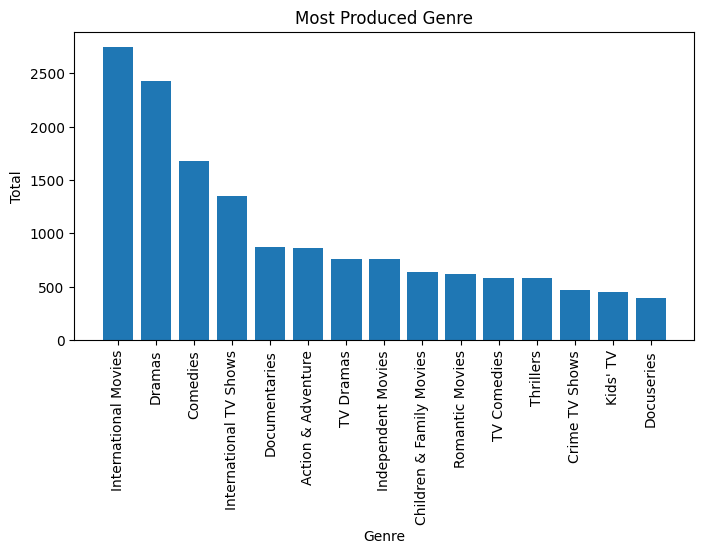

In [ ]:
# Visualize
plt.figure(figsize=(8,4))
plt.bar(most_produced_genre.index, most_produced_genre)
plt.title('Most Produced Genre')
plt.xlabel('Genre')
plt.ylabel('Total')
plt.xticks(rotation='vertical')
plt.show()

## Most Casted Actor / Actress

In [ ]:
# Simplify the dataframe
df_title_cast = df[['title', 'cast']]
df_title_cast

,title,cast
0,Dick Johnson Is Dead,NaN
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
3,Jailbirds New Orleans,NaN
4,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."
...,...,...
8802,Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J..."
8803,Zombie Dumb,NaN
8804,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ..."
8805,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma..."


In [ ]:
# Checking null
df_title_cast['cast'].notnull()

0       False
1        True
2        True
3       False
4        True
        ...  
8802     True
8803    False
8804     True
8805     True
8806     True
Name: cast, Length: 8807, dtype: bool

In [ ]:
# Remove null value
df_title_cast = df_title_cast[df_title_cast['cast'].notnull()]
df_title_cast

,title,cast
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
4,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."
5,Midnight Mass,"Kate Siegel, Zach Gilford, Hamish Linklater, H..."
6,My Little Pony: A New Generation,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ..."
...,...,...
8801,Zinzana,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ..."
8802,Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J..."
8804,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ..."
8805,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma..."


In [ ]:
# Explode the list of cast into new row based on title
df_title_cast = df_title_cast.set_index('title').cast.str.split(',', expand=True).stack().reset_index('title')
df_title_cast

,title,0
0,Blood & Water,Ama Qamata
1,Blood & Water,Khosi Ngema
2,Blood & Water,Gail Mabalane
3,Blood & Water,Thabang Molaba
4,Blood & Water,Dillon Windvogel
...,...,...
3,Zubaan,Manish Chaudhary
4,Zubaan,Meghna Malik
5,Zubaan,Malkeet Rauni
6,Zubaan,Anita Shabdish


In [ ]:
# Changing the column name back into cast
df_title_cast.columns = ['title', 'cast']
df_title_cast.columns

Index(['title', 'cast'], dtype='object')

In [ ]:
# Check unique cast
df_title_cast['cast'].unique()

array(['Ama Qamata', ' Khosi Ngema', ' Gail Mabalane', ...,
       ' Malkeet Rauni', ' Anita Shabdish', ' Chittaranjan Tripathy'],
      dtype=object)

In [ ]:
# Remove and combine the duplicated cast because of whitespace
df_title_cast['cast'] = df_title_cast['cast'].str.strip()
df_title_cast['cast'].unique()

array(['Ama Qamata', 'Khosi Ngema', 'Gail Mabalane', ..., 'Malkeet Rauni',
       'Anita Shabdish', 'Chittaranjan Tripathy'], dtype=object)

In [ ]:
# Total number of most casted actor / actress
most_casted = df_title_cast['cast'].value_counts()[:15]
most_casted

Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Amitabh Bachchan    28
Boman Irani         27
Rajesh Kava         26
Vincent Tong        26
Andrea Libman       25
Name: cast, dtype: int64

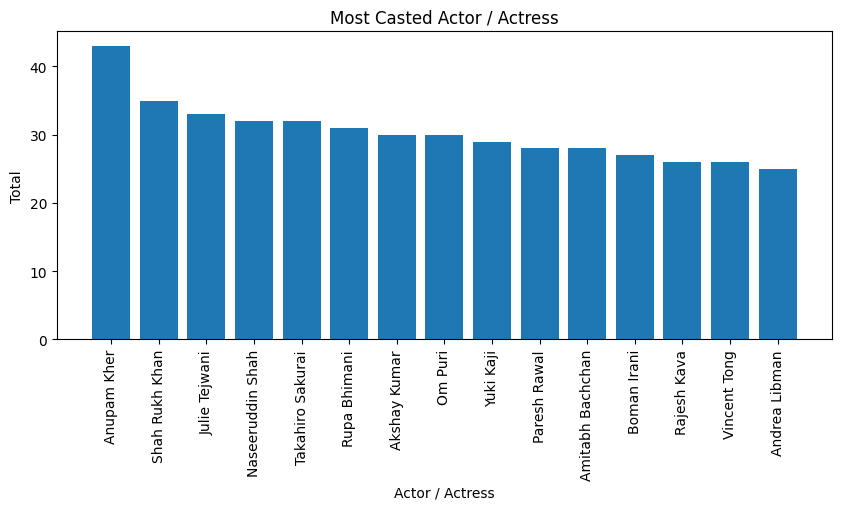

In [ ]:
# Visualize
plt.figure(figsize=(10,4))
plt.bar(most_casted.index, most_casted)
plt.title('Most Casted Actor / Actress')
plt.xlabel('Actor / Actress')
plt.ylabel('Total')
plt.xticks(rotation='vertical')
plt.show()

## Country with Most Produced TV Shows & Movies

In [ ]:
# Simplify the dataframe
df_title_country = df[['title', 'country']]
df_title_country

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,NaN
3,Jailbirds New Orleans,NaN
4,Kota Factory,India
...,...,...
8802,Zodiac,United States
8803,Zombie Dumb,NaN
8804,Zombieland,United States
8805,Zoom,United States


In [ ]:
# Checking null
df_title_country['country'].notnull()

0        True
1        True
2       False
3       False
4        True
        ...  
8802     True
8803    False
8804     True
8805     True
8806     True
Name: country, Length: 8807, dtype: bool

In [ ]:
# Remove null value
df_title_country = df_title_country[df_title_country['country'].notnull()]
df_title_country

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
4,Kota Factory,India
7,Sankofa,"United States, Ghana, Burkina Faso, United Kin..."
8,The Great British Baking Show,United Kingdom
...,...,...
8801,Zinzana,"United Arab Emirates, Jordan"
8802,Zodiac,United States
8804,Zombieland,United States
8805,Zoom,United States


In [ ]:
# Explode the list of cast into new row based on title
df_title_country = df_title_country.set_index('title').country.str.split(',', expand=True).stack().reset_index('title')
df_title_country

,title,0
0,Dick Johnson Is Dead,United States
0,Blood & Water,South Africa
0,Kota Factory,India
0,Sankofa,United States
1,Sankofa,Ghana
...,...,...
1,Zinzana,Jordan
0,Zodiac,United States
0,Zombieland,United States
0,Zoom,United States


In [ ]:
# Changing the column name back into country
df_title_country.columns = ['title', 'country']
df_title_country.columns

Index(['title', 'country'], dtype='object')

In [ ]:
# Check unique country
df_title_country['country'].unique()

array(['United States', 'South Africa', 'India', ' Ghana',
       ' Burkina Faso', ' United Kingdom', ' Germany', ' Ethiopia',
       'United Kingdom', 'Germany', ' Czech Republic', 'Mexico', 'Turkey',
       'Australia', ' India', ' France', 'Finland', 'China', ' Canada',
       ' United States', ' Japan', 'Nigeria', 'Japan', 'Spain', 'France',
       'Belgium', 'South Korea', ' Singapore', ' Australia', ' Mexico',
       ' Italy', ' Romania', 'Argentina', ' Venezuela', ' Hong Kong',
       'Russia', 'Canada', 'Hong Kong', ' China', 'Italy', '',
       ' South Korea', 'Ireland', ' Nepal', 'New Zealand', ' Brazil',
       ' Greece', 'Jordan', 'Colombia', 'Switzerland', 'Israel', 'Brazil',
       ' Spain', 'Taiwan', ' Nigeria', 'Bulgaria', ' Algeria', 'Poland',
       ' Israel', 'Saudi Arabia', 'Thailand', 'Indonesia', 'Egypt',
       ' Denmark', ' Switzerland', 'Kuwait', ' Netherlands', ' Belgium',
       'Malaysia', ' New Zealand', 'Vietnam', ' Hungary', 'Sweden',
       'Lebanon', 'R

In [ ]:
# Remove and combine the duplicated country because of whitespace
df_title_country['country'] = df_title_country['country'].str.strip()
df_title_country['country'].unique()

array(['United States', 'South Africa', 'India', 'Ghana', 'Burkina Faso',
       'United Kingdom', 'Germany', 'Ethiopia', 'Czech Republic',
       'Mexico', 'Turkey', 'Australia', 'France', 'Finland', 'China',
       'Canada', 'Japan', 'Nigeria', 'Spain', 'Belgium', 'South Korea',
       'Singapore', 'Italy', 'Romania', 'Argentina', 'Venezuela',
       'Hong Kong', 'Russia', '', 'Ireland', 'Nepal', 'New Zealand',
       'Brazil', 'Greece', 'Jordan', 'Colombia', 'Switzerland', 'Israel',
       'Taiwan', 'Bulgaria', 'Algeria', 'Poland', 'Saudi Arabia',
       'Thailand', 'Indonesia', 'Egypt', 'Denmark', 'Kuwait',
       'Netherlands', 'Malaysia', 'Vietnam', 'Hungary', 'Sweden',
       'Lebanon', 'Syria', 'Philippines', 'Iceland',
       'United Arab Emirates', 'Norway', 'Qatar', 'Mauritius', 'Austria',
       'Cameroon', 'Palestine', 'Uruguay', 'Kenya', 'Chile', 'Luxembourg',
       'Cambodia', 'Bangladesh', 'Portugal', 'Cayman Islands', 'Senegal',
       'Serbia', 'Malta', 'Namibia', 'A

In [ ]:
# Total number of most produced country
most_country = df_title_country['country'].value_counts()[:15]
most_country

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
China              162
Australia          160
Egypt              117
Turkey             113
Hong Kong          105
Name: country, dtype: int64

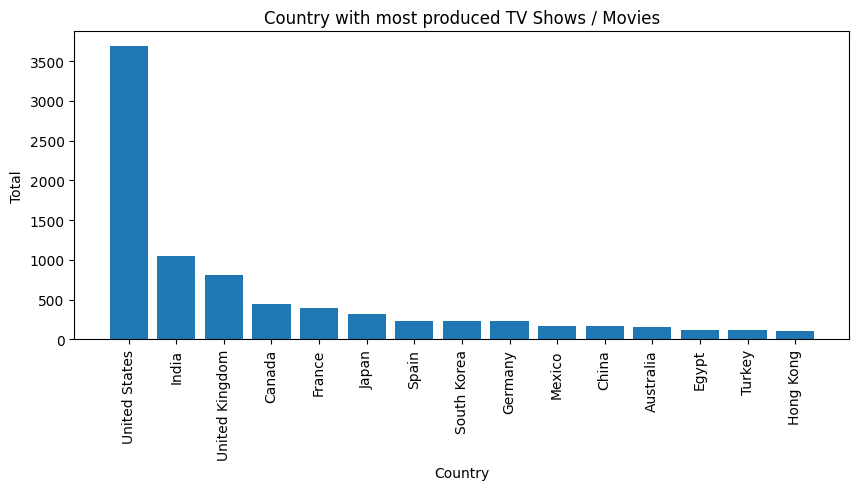

In [ ]:
# Visualize
plt.figure(figsize=(10,4))
plt.bar(most_country.index, most_country)
plt.title('Country with most produced TV Shows / Movies')
plt.xlabel('Country')
plt.ylabel('Total')
plt.xticks(rotation='vertical')
plt.show()

## Most Active Director on All TV Shows & Movies

In [ ]:
# Simplify the dataframe
df_director = df[['title', 'director']]
df_director

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,NaN
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,NaN
4,Kota Factory,NaN
...,...,...
8802,Zodiac,David Fincher
8803,Zombie Dumb,NaN
8804,Zombieland,Ruben Fleischer
8805,Zoom,Peter Hewitt


In [ ]:
# Checking null
df_director['director'].notnull()

0        True
1       False
2        True
3       False
4       False
        ...  
8802     True
8803    False
8804     True
8805     True
8806     True
Name: director, Length: 8807, dtype: bool

In [ ]:
# Remove null value
df_director = df_director[df_director['director'].notnull()]
df_director

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
2,Ganglands,Julien Leclercq
5,Midnight Mass,Mike Flanagan
6,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha"
7,Sankofa,Haile Gerima
...,...,...
8801,Zinzana,Majid Al Ansari
8802,Zodiac,David Fincher
8804,Zombieland,Ruben Fleischer
8805,Zoom,Peter Hewitt


In [ ]:
# Explode the list of director into new row based on title
df_director = df_director.set_index('title').director.str.split(',', expand=True).stack().reset_index('title')
df_director

,title,0
0,Dick Johnson Is Dead,Kirsten Johnson
0,Ganglands,Julien Leclercq
0,Midnight Mass,Mike Flanagan
0,My Little Pony: A New Generation,Robert Cullen
1,My Little Pony: A New Generation,José Luis Ucha
...,...,...
0,Zinzana,Majid Al Ansari
0,Zodiac,David Fincher
0,Zombieland,Ruben Fleischer
0,Zoom,Peter Hewitt


In [ ]:
# Changing the column name back into director
df_director.columns = ['title', 'director']
df_director.columns

Index(['title', 'director'], dtype='object')

In [ ]:
# Check unique director
df_director['director'].unique()

array(['Kirsten Johnson', 'Julien Leclercq', 'Mike Flanagan', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [ ]:
# Remove and combine the duplicated director because of whitespace
df_director['director'] = df_director['director'].str.strip()
df_director['director'].unique()

array(['Kirsten Johnson', 'Julien Leclercq', 'Mike Flanagan', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [ ]:
# Total number of most active director
most_directing = df_director['director'].value_counts()[:15]
most_directing

Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Martin Scorsese        12
Steven Spielberg       11
Don Michael Paul       10
Shannon Hartman         9
Yılmaz Erdoğan          9
David Dhawan            9
Name: director, dtype: int64

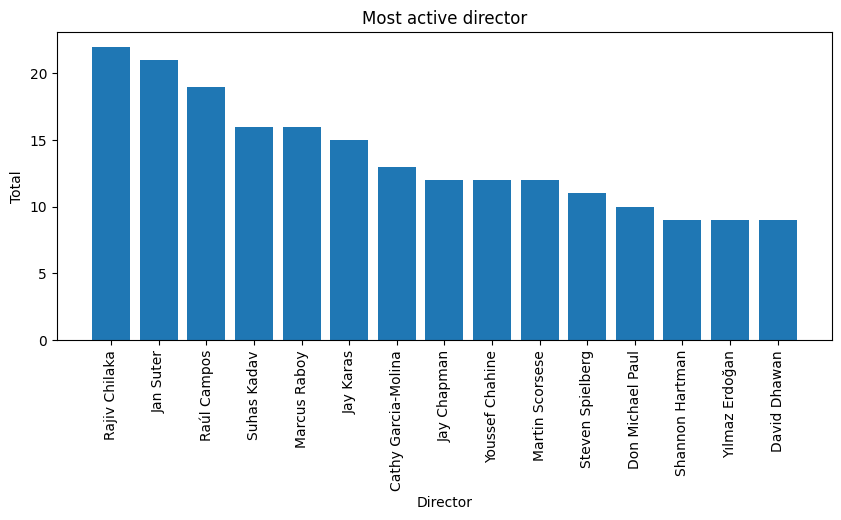

In [ ]:
# Visualize
plt.figure(figsize=(10,4))
plt.bar(most_directing.index, most_directing)
plt.title('Most active director')
plt.xlabel('Director')
plt.ylabel('Total')
plt.xticks(rotation='vertical')
plt.show()

## Top Longest Season TV Shows

In [ ]:
# TV show only
df_show = df[df['type']=='TV Show']
df_show

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [ ]:
# Simplify the dataframe
df_season = df_show[['title', 'duration']]
df_season

,title,duration
1,Blood & Water,2 Seasons
2,Ganglands,1 Season
3,Jailbirds New Orleans,1 Season
4,Kota Factory,2 Seasons
5,Midnight Mass,1 Season
...,...,...
8795,Yu-Gi-Oh! Arc-V,2 Seasons
8796,Yunus Emre,2 Seasons
8797,Zak Storm,3 Seasons
8800,Zindagi Gulzar Hai,1 Season


In [ ]:
# Changing duration value into number only
df_season['duration'] = df_season['duration'].str.extract(r'(\d+[.\d]*)')
df_season

<ipython-input-80-260df7083f27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_season['duration'] = df_season['duration'].str.extract(r'(\d+[.\d]*)')


,title,duration
1,Blood & Water,2
2,Ganglands,1
3,Jailbirds New Orleans,1
4,Kota Factory,2
5,Midnight Mass,1
...,...,...
8795,Yu-Gi-Oh! Arc-V,2
8796,Yunus Emre,2
8797,Zak Storm,3
8800,Zindagi Gulzar Hai,1


In [ ]:
# Checking data types of duration column
df_season.dtypes

title       object
duration    object
dtype: object

In [ ]:
# Change duration data types into float
df_season['duration'] = df_season['duration'].astype(float)
df_season.dtypes

<ipython-input-82-f5be3cbeb2d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_season['duration'] = df_season['duration'].astype(float)


title        object
duration    float64
dtype: object

In [ ]:
# Sort the dataframe based on longest season
df_season_sorted = df_season.sort_values(by=['duration'], ascending=False)[:15]
df_season_sorted

,title,duration
548,Grey's Anatomy,17.0
2423,Supernatural,15.0
4798,NCIS,15.0
1354,Heartland,13.0
4220,COMEDIANS of the world,13.0
7847,Red vs. Blue,13.0
4964,Trailer Park Boys,12.0
5412,Criminal Minds,12.0
6795,Frasier,11.0
6456,Cheers,11.0


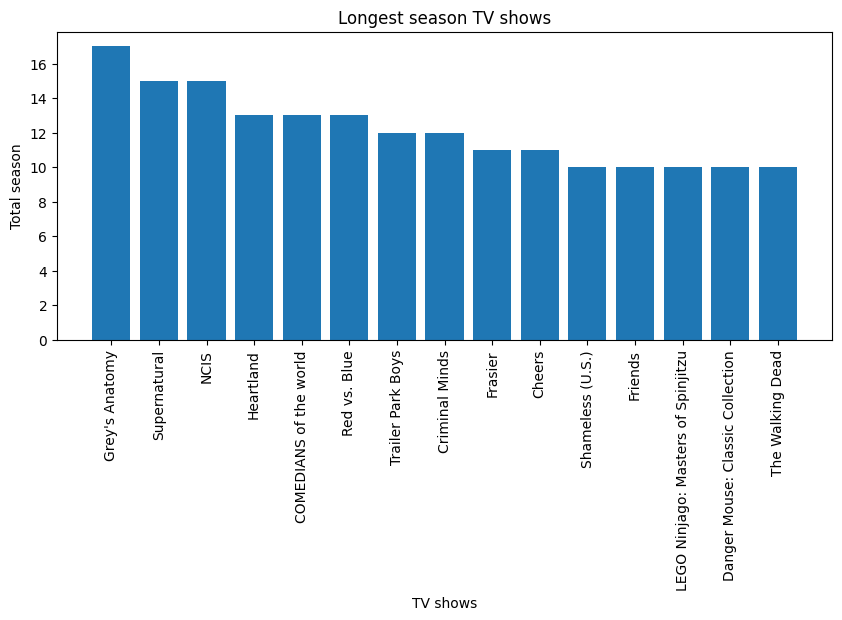

In [ ]:
# Visualize
plt.figure(figsize=(10,4))
plt.bar(df_season_sorted['title'], df_season_sorted['duration'])
plt.title('Longest season TV shows')
plt.xlabel('TV shows')
plt.ylabel('Total season')
plt.xticks(rotation='vertical')
plt.show()

## Overall Duration of All Movies

In [ ]:
# Movie only
df_movie = df[df['type']=='Movie']
df_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
# Simplify the dataframe
df_duration = df_movie[['title', 'duration']]
df_duration

,title,duration
0,Dick Johnson Is Dead,90 min
6,My Little Pony: A New Generation,91 min
7,Sankofa,125 min
9,The Starling,104 min
12,Je Suis Karl,127 min
...,...,...
8801,Zinzana,96 min
8802,Zodiac,158 min
8804,Zombieland,88 min
8805,Zoom,88 min


In [ ]:
# Changing duration value into number only
df_duration['duration'] = df_duration['duration'].str.extract(r'(\d+[.\d]*)')
df_duration

<ipython-input-87-c9d02cd5f451>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duration['duration'] = df_duration['duration'].str.extract(r'(\d+[.\d]*)')


,title,duration
0,Dick Johnson Is Dead,90
6,My Little Pony: A New Generation,91
7,Sankofa,125
9,The Starling,104
12,Je Suis Karl,127
...,...,...
8801,Zinzana,96
8802,Zodiac,158
8804,Zombieland,88
8805,Zoom,88


In [ ]:
# Checking data types of duration column
df_duration.dtypes

title       object
duration    object
dtype: object

In [ ]:
# Change duration data types into float
df_duration['duration'] = df_duration['duration'].astype(float)
df_duration.dtypes

<ipython-input-89-d150c547c7cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duration['duration'] = df_duration['duration'].astype(float)


title        object
duration    float64
dtype: object

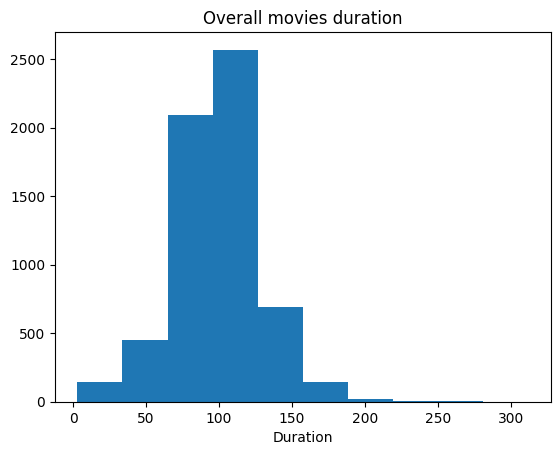

In [ ]:
# Visualize
plt.hist(df_duration['duration'])
plt.title('Overall movies duration')
plt.xlabel('Duration')
plt.show()